In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
# Reading Data
data = pd.read_csv('/content/diabetics.csv')
print(data.head())
#print(data.keys)

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5   S6    Y
0   35    1  41.3   81.0  168  102.8  37.0  5.0  4.9488   94  346
1   58    2  38.0  103.0  150  107.2  22.0  7.0  4.6444   98  341
2   58    2  36.7  117.0  166   93.8  44.0  4.0  4.9488  109  336
3   65    2  33.5  102.0  190  126.2  35.0  5.0  4.9698  102  332
4   54    2  36.1  115.0  163   98.4  43.0  4.0  4.6821  101  321


In [0]:
# Collecting X and Y
X1 = data['BMI'].values
X2=data['BP'].values
Y = data['Y'].values
print(X2)

[ 81.   103.   117.   102.   115.    81.   104.    85.   117.   120.
 123.    84.   116.    90.   113.   124.    97.   115.   115.   103.
 102.   113.   113.   120.   110.   101.   119.   123.    87.33 103.
 112.    78.   115.   114.    82.67  93.   125.   111.    84.   101.
 131.   117.    96.    94.   110.    88.   106.   115.   123.   111.
  91.    89.   113.    97.   113.    91.33 113.   112.    86.   112.
 123.33 110.   123.    88.   107.    98.   109.   113.   109.    87.
 108.   103.67  93.   107.   120.   126.   112.67  99.    85.   108.
 106.   103.   122.   106.   100.    90.    90.   110.   103.33 109.
  93.   117.67  93.   103.    87.33 110.   100.   105.67  78.    95.
  95.    90.   109.   115.   126.   133.   110.   101.    83.    85.
 101.    81.    97.   109.    84.    91.    83.    91.   103.   119.
  73.    73.    94.    98.    96.    98.33  83.    84.    98.   104.33
  85.67  93.   109.   105.    92.   120.    75.33  99.   108.    85.
 110.67 126.    89.   109.    97

Text(0, 0.5, 'Frequency')

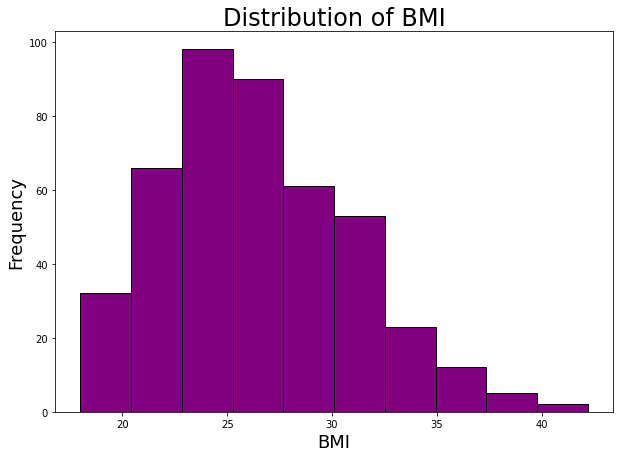

In [0]:
# Histogram of the BMI
data.BMI.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of BMI', size=24)
plt.xlabel('BMI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

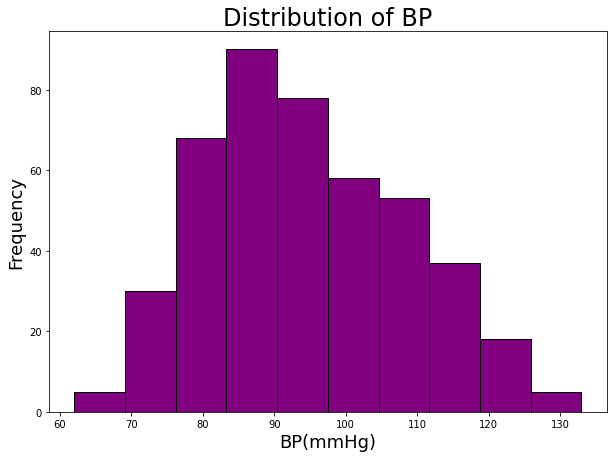

In [0]:
# Histogram of the BMI
data.BP.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of BP', size=24)
plt.xlabel('BP(mmHg)', size=18)
plt.ylabel('Frequency', size=18)

In [0]:
#LOADING FEATURES AND TARGET
feature1 = pd.DataFrame(X1, columns=['BMI'])
feature2=pd.DataFrame(X2,columns=['BP'])
target = pd.DataFrame(Y, columns=['TARGET'])
data = pd.concat([feature1,feature2, target], axis=1)
print(data)

      BMI     BP  TARGET
0    41.3   81.0     346
1    38.0  103.0     341
2    36.7  117.0     336
3    33.5  102.0     332
4    36.1  115.0     321
..    ...    ...     ...
437  21.2   90.0      39
438  25.6   78.0      39
439  20.5   80.0      37
440  25.6   76.0      31
441  25.4   95.0      25

[442 rows x 3 columns]


In [0]:
#PEARSON CORRELATION
data2 = data.corr('pearson')
abs(data2.loc['TARGET']).sort_values()

BP        0.441482
BMI       0.586450
TARGET    1.000000
Name: TARGET, dtype: float64

In [0]:
#MIN-MAX NORMALIZING
X1 = np.array((X1 - X1.min())/(X1.max() - X1.min()))
X2 = np.array((X2 - X2.min())/(X2.max() - X2.min()))
Y = np.array((Y - Y.min())/(Y.max() - Y.min()))

In [0]:
print(X2)

[0.26760563 0.57746479 0.77464789 0.56338028 0.74647887 0.26760563
 0.5915493  0.32394366 0.77464789 0.81690141 0.85915493 0.30985915
 0.76056338 0.3943662  0.71830986 0.87323944 0.49295775 0.74647887
 0.74647887 0.57746479 0.56338028 0.71830986 0.71830986 0.81690141
 0.67605634 0.54929577 0.8028169  0.85915493 0.35676056 0.57746479
 0.70422535 0.22535211 0.74647887 0.73239437 0.29112676 0.43661972
 0.88732394 0.69014085 0.30985915 0.54929577 0.97183099 0.77464789
 0.47887324 0.45070423 0.67605634 0.36619718 0.61971831 0.74647887
 0.85915493 0.69014085 0.4084507  0.38028169 0.71830986 0.49295775
 0.71830986 0.41309859 0.71830986 0.70422535 0.33802817 0.70422535
 0.86380282 0.67605634 0.85915493 0.36619718 0.63380282 0.50704225
 0.66197183 0.71830986 0.66197183 0.35211268 0.64788732 0.58690141
 0.43661972 0.63380282 0.81690141 0.90140845 0.71366197 0.52112676
 0.32394366 0.64788732 0.61971831 0.57746479 0.84507042 0.61971831
 0.53521127 0.3943662  0.3943662  0.67605634 0.58211268 0.6619

In [0]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)

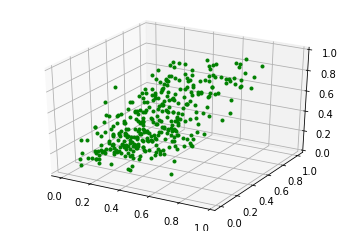

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')

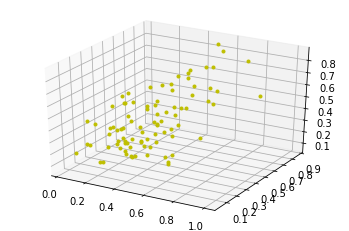

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test, x2_test, y_test, 'y.')

In [0]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * x2 + c

In [0]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i],x2[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [0]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [0]:
def descend(initial_a, initial_b, initial_c, x1, x2, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x1, x2, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x1, x2, y, learning_rate)

    return a, b, c

In [0]:


a = 0.674020503102563
b =0.30147535270980425
c = 0.030124690459188253
learning_rate = 0.01
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)

Error: 0.017873030463357337, a: 0.674020503102563, b: 0.30147535270980425, c: 0.030124690459188253
Error: 0.0178730291897352, a: 0.6741403196390623, b: 0.3013718910723697, c: 0.030131402163977073
Error: 0.01787302864271315, a: 0.6742188113319675, b: 0.30130405129680105, c: 0.030135829093297165
Error: 0.017873028407766417, a: 0.674270237037804, b: 0.30125957522617364, c: 0.03013874365132486
Error: 0.01787302830685642, a: 0.6743039325789218, b: 0.301230419541332, c: 0.030140660001339793
Error: 0.01787302826351543, a: 0.6743260121256129, b: 0.30121130835224086, c: 0.030141918846801813
Error: 0.01787302824490038, a: 0.6743404807150151, b: 0.3011987818745922, c: 0.03014274522969453
Error: 0.017873028236905196, a: 0.6743499621783924, b: 0.3011905716773197, c: 0.030143287460177484
Error: 0.017873028233471245, a: 0.6743561756450941, b: 0.3011851906364313, c: 0.030143643123421944
Error: 0.017873028231996355, a: 0.674360247566029, b: 0.3011816639208022, c: 0.030143876355577356


In [0]:
print(error(a, b, c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_test, x2_test, y_test))

0.017873030463357337
0.01787302823136289
0.015589003977654557


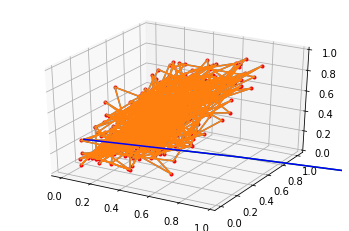

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.plot(x1_test, x2_test, y_test, 'y.')
ax.plot(x1_train,x2_train, y_train, 'r.', x1_train,x2_train, hypothesis(a, b,c, x1_train,x2_train), 'g', x1_train,x2_train, hypothesis(final_a, final_b,final_c, x1_train,x2_train), 'b', )

In [0]:
print(str((1-error(final_a, final_b,final_c,x1_test,x2_test, y_test))*100) + " %")

98.44109960223454 %
